In [5]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', ':', '(', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '', '–', 'still', 'good', 'well',
'said', 'â\x80\x9ci', 'gutenberg-tm', 'mr', 'project', 'one', 'uh', 'don’t',
 'would', 'made']


# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def debate_word_dictionary_generator (URL, name1, name2, modList):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds[i] = cleanWord (wds [i])
        
    name1Arr = []
    name2Arr = []
    switcher = 3
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
            
        elif wds[i] in modList:
            switcher = 3
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf1 = Counter (name1Arr)
    wf2 = Counter (name2Arr)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf1. pop(k, None)
        wf2. pop(k, None)
           
        
    #how many regular words in the document?
    tw1 = 0
    for w in wf1:
       tw1 += wf1[w]
        
    tw2 = 0
    for w in wf2:
       tw2 += wf2[w] 
    # Get ordered list
    wfs1 = sorted (wf1 .items(), key = operator.itemgetter(1), reverse=True)
    ml1 = min(len(wfs1),30)
    
    wfs2 = sorted (wf2 .items(), key = operator.itemgetter(1), reverse=True)
    ml2 = min(len(wfs2),30)
    

    #Reverse the list because barh plots items from the bottom
    return [(wfs1 [ 0:ml1 ] [::-1], tw1), (wfs2 [ 0:ml2 ] [::-1], tw2)]
        
# Now populate two lists    
debateArr = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/september-25-1988-debate-transcript/', "bush:", "dukakis:", ['lehrer:', 'mashek:', 'groer:', 'jennings:'])
debateArr2 = debate_word_dictionary_generator ('https://www.debates.org/voter-education/debate-transcripts/october-13-1988-debate-transcript/', "bush:", "dukakis:", ['shaw:', 'compton:', 'warner:', 'mitchell:'])

print(debateArr[0][0])
print(debateArr[1][0])
print(debateArr2[0][0])
print(debateArr2[1][0])

[('governor', 10), ('program', 10), ('little', 10), ('know', 10), ('believe', 10), ('talking', 11), ('i’ve', 11), ('federal', 11), ('say', 11), ('right', 12), ('government', 12), ('country', 12), ('education', 12), ('terms', 12), ('things', 12), ('man', 13), ('better', 13), ('like', 14), ('go', 15), ('president', 15), ('we’re', 16), ('got', 17), ('i’m', 18), ('we’ve', 18), ('it’s', 23), ('going', 27), ('people', 27), ('see', 29), ('want', 34), ('think', 38)]
[('got', 15), ('kind', 15), ('important', 15), ('we’re', 16), ('state', 16), ('leadership', 16), ('housing', 17), ('going', 17), ('i’m', 17), ('he’s', 17), ('values', 17), ('health', 18), ('time', 18), ('families', 19), ('strong', 19), ('want', 19), ('drug', 20), ('help', 20), ('make', 23), ('know', 23), ('we’ve', 23), ('bush', 25), ('vice', 26), ('us', 26), ('that’s', 32), ('people', 35), ('president', 37), ('it’s', 42), ('think', 43), ('country', 46)]
[('states', 10), ('like', 10), ('support', 10), ('clean', 11), ('united', 11), 

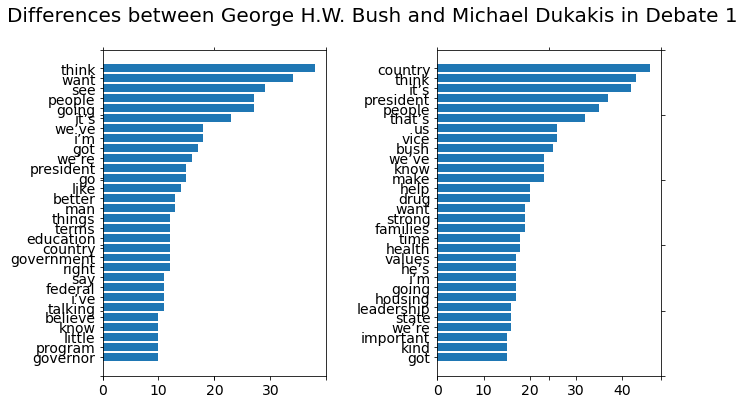

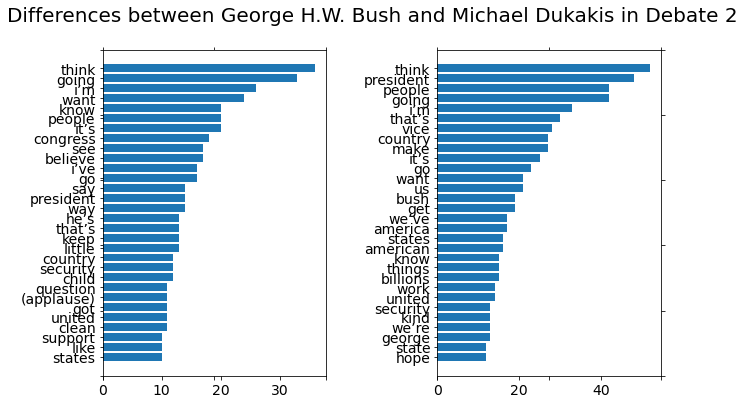

In [3]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (debateArr[0][0], debateArr[1][0], 'Differences between George H.W. Bush and Michael Dukakis in Debate 1')
plotTwoLists (debateArr2[0][0], debateArr2[1][0], 'Differences between George H.W. Bush and Michael Dukakis in Debate 2')